([<matplotlib.axis.XTick at 0x14c0769fd120>,
 [Text(0, 0, '0'),
  Text(2000, 0, '200'),
  Text(4000, 0, '400'),
  Text(6000, 0, '600'),
  Text(8000, 0, '800'),
  Text(10000, 0, '1000'),
  Text(12000, 0, '1200'),
  Text(14000, 0, '1400'),
  Text(16000, 0, '1600')])

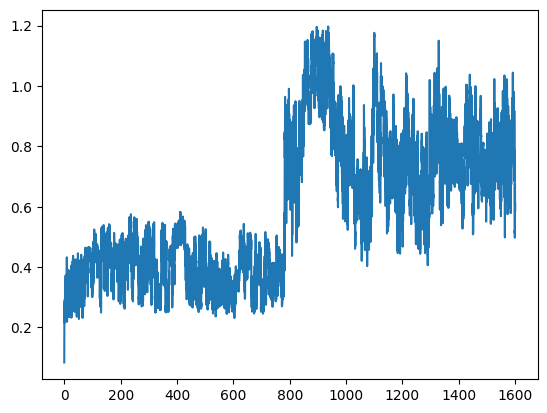

In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import pickle


gleap_target = md.load("../2_md-preparation/gleap.target.gro")
protein_indices = gleap_target.topology.select("resid 5 to 48")
strutured_region_indices = gleap_target.topology.select("resid 15 to 48")
rna_indices = gleap_target.topology.select("resid 0 to 4")

cmd_rmsd = np.zeros(16001)
xtc = md.load("../5_npt-11/npt.skip10.whole.cluster.target.xtc", top=gleap_target)
xtc = xtc.superpose(gleap_target, atom_indices=strutured_region_indices, ref_atom_indices=strutured_region_indices)
cmd_rmsd[:2001] = md.rmsd(xtc, gleap_target, atom_indices=protein_indices)

xtc = md.load("../6_prd-1/prd.skip10.whole.cluster.target.xtc", top=gleap_target)
xtc = xtc.superpose(gleap_target, atom_indices=strutured_region_indices, ref_atom_indices=strutured_region_indices)
cmd_rmsd[2000:12001] = md.rmsd(xtc, gleap_target, atom_indices=protein_indices)

xtc = md.load("../6_prd-4/prd.skip10.whole.cluster.target.xtc", top=gleap_target)
xtc = xtc.superpose(gleap_target, atom_indices=strutured_region_indices, ref_atom_indices=strutured_region_indices)
cmd_rmsd[12000:16001] = md.rmsd(xtc, gleap_target, atom_indices=protein_indices)

plt.plot(cmd_rmsd)
plt.xticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000], [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600])

In [12]:
pacs_g_stds_ordered = [(19, -3.4383222715529755), (18, -4.064455225716387), (30, -4.48612942287419), (26, -4.624781171615315), (29, -4.683410979897177), (25, -4.933236290336003), (17, -5.118835703750063), (23, -5.521004724688876), (20, -5.522645853979005), (28, -5.678007148970815), (3, -5.678261127542603), (22, -5.93031226290956), (24, -5.966115973285376), (21, -6.022353770917038), (4, -6.125216702283895), (31, -6.224672440089437), (16, -6.2739255360777175), (11, -6.287913880137764), (7, -6.520357463407324), (2, -6.873004446601907), (5, -7.305598346706374), (15, -7.425622465131511), (9, -7.442437949729127), (8, -7.627195073788825), (1, -8.100851065532183), (10, -8.265797922888845), (12, -8.413117936507568), (27, -8.424109846287314), (13, -9.041054919020613), (14, -9.094471340851847), (6, -9.28998243345896), (0, -10.433896108969531)]

pacs_g_stds_ordered_by_trial = [None for _ in range(32)]
for trial, g_std in pacs_g_stds_ordered:
    pacs_g_stds_ordered_by_trial[trial] = g_std

pacs_category = {"high": [], "low": []}
for i in range(len(pacs_g_stds_ordered)):
    if i < 13:
        pacs_category["high"].append(pacs_g_stds_ordered[i][0])
    else:
        pacs_category["low"].append(pacs_g_stds_ordered[i][0])

for trial in range(32):
    if trial in pacs_category["high"]:
        print(f"{trial+1}\t{400+trial*25}\t{round(pacs_g_stds_ordered_by_trial[trial], 1)}\tHigh")
    else:
        print(f"{trial+1}\t{400+trial*25}\t{round(pacs_g_stds_ordered_by_trial[trial], 1)}\tLow")

1	400	-10.4	Low
2	425	-8.1	Low
3	450	-6.9	Low
4	475	-5.7	High
5	500	-6.1	Low
6	525	-7.3	Low
7	550	-9.3	Low
8	575	-6.5	Low
9	600	-7.6	Low
10	625	-7.4	Low
11	650	-8.3	Low
12	675	-6.3	Low
13	700	-8.4	Low
14	725	-9.0	Low
15	750	-9.1	Low
16	775	-7.4	Low
17	800	-6.3	Low
18	825	-5.1	High
19	850	-4.1	High
20	875	-3.4	High
21	900	-5.5	High
22	925	-6.0	Low
23	950	-5.9	High
24	975	-5.5	High
25	1000	-6.0	High
26	1025	-4.9	High
27	1050	-4.6	High
28	1075	-8.4	Low
29	1100	-5.7	High
30	1125	-4.7	High
31	1150	-4.5	High
32	1175	-6.2	Low
